### **AULA 4 ANALISE EXPLORATORIA**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("../data/superstoresales.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df["Sales"].value_counts()

Sales
12.960      55
19.440      39
15.552      39
10.368      35
25.920      34
            ..
2.496        1
10.984       1
364.080      1
268.576      1
4404.900     1
Name: count, Length: 5757, dtype: int64

In [7]:
media = df["Sales"].mean()
mediana = df["Sales"].median()
moda = df["Sales"].mode()

print(f"Média: {media:.2f}, Mediana: {mediana:.2f}, moda: {moda} ")

Média: 230.77, Mediana: 54.49, moda: 0    12.96
Name: Sales, dtype: float64 


In [8]:
variancia = df["Sales"].var()
desvio_padrao = df["Sales"].std()

print(f"desvio_padrao: {desvio_padrao:.2f}, variancia: {variancia:.2f}")

desvio_padrao: 626.65, variancia: 392692.57


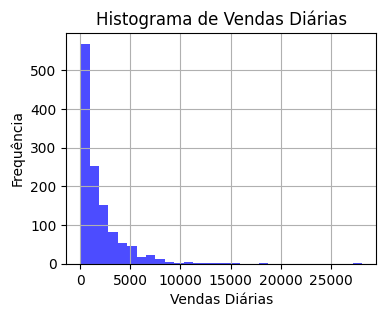

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

vendas_diarias = df.groupby(df['Order Date'].dt.date)['Sales'].sum()

plt.figure(figsize=(4, 3))
plt.hist(vendas_diarias, bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Vendas Diárias')
plt.xlabel('Vendas Diárias')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

O histograma indica que as vendas têm uma distribuição simétrica ou assimétrica?

Assimétrica a esquerda

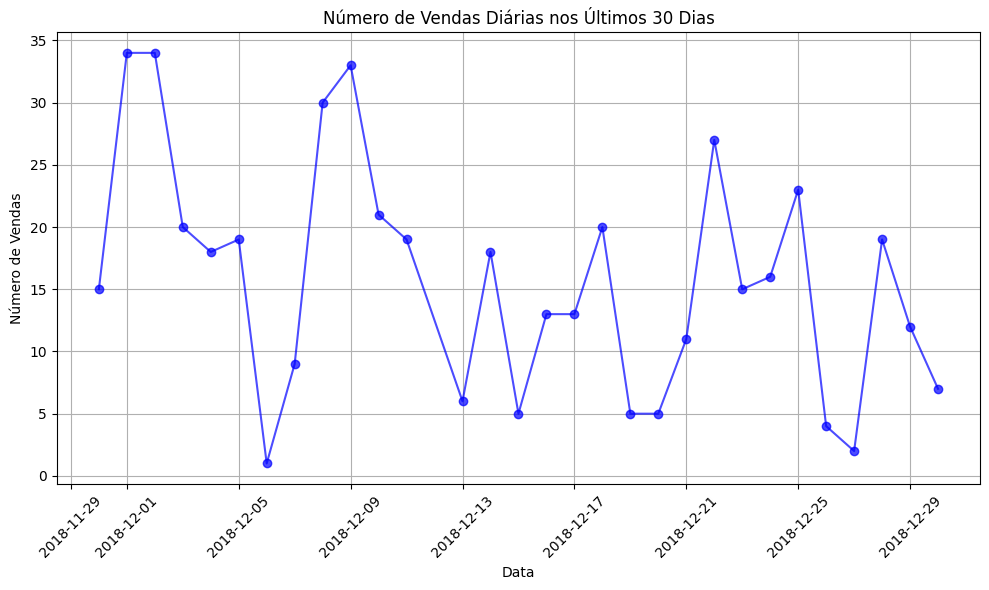

In [10]:
df = df.sort_values(by='Order Date', ascending=True)

ultimo_dia = df['Order Date'].max()
primeiro_dia = ultimo_dia - pd.Timedelta(days=30)

df_ultimos_30_dias = df[df['Order Date'] >= primeiro_dia]

vendas_diarias = df_ultimos_30_dias.groupby(df_ultimos_30_dias['Order Date'].dt.date)['Sales'].count()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias.index, vendas_diarias.values, marker='o', color='b', linestyle='-', alpha=0.7)

plt.title('Número de Vendas Diárias nos Últimos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

O gráfico de linhas mostra alguma tendência ou sazonalidade nas vendas?

O começo do mês tem uma tendência de vender mais, porém há uma queda,e depois que se establiza novamente as vendas decaem levemente no restante do mês

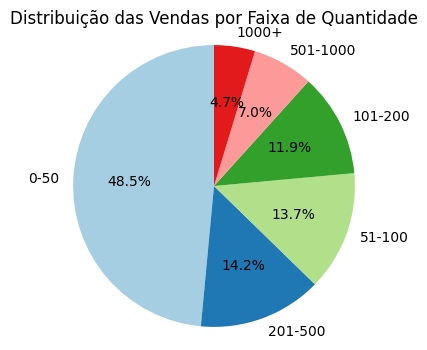

In [11]:
bins = [0, 50, 100, 200, 500, 1000, df['Sales'].max()]
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']

df['Faixa de Vendas'] = pd.cut(df['Sales'], bins=bins, labels=labels, right=False)
faixa_vendas = df['Faixa de Vendas'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(faixa_vendas, labels=faixa_vendas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribuição das Vendas por Faixa de Quantidade')
plt.axis('equal')

plt.show()

No gráfico de pizza, qual faixa de vendas representa a maior parcela?

0-50

In [12]:
df.describe()

,Row ID,Order Date,Postal Code,Sales
count,9800.000000,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,32041.223413,626.651875


In [19]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

AIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * AIQ
limite_superior = Q3 + 1.5 * AIQ

outliers = df[(df['Sales'] < limite_inferior) | (df['Sales'] > limite_superior)]

print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)
print("Outliers detectados na coluna 'Sales':\n", outliers['Sales'].values)

Limite Inferior: -272.7875000000001
Limite Superior: 500.6405000000001
Outliers detectados na coluna 'Sales':
 [ 755.96 2573.82  609.98 ...  750.68  725.84 1207.84]
